## Step 1. VAR 이란?

VAR이란 Vector Autoregression, `벡터자기회귀` 모형을 의미한다. 
기본적인 자기회귀모형이 단변량 시계열 예측에서 사용된다면 벡터자기회귀모형은 다변량 예측에 사용된다. 즉, 2개 이상의 같은 기간에 대한 데이터셋이 서로 다른 변수로 서로 영향을 주는 관계인 경우 벡터자기회귀 모형을 사용한다.

단변량 예측에 사용되는 자기회귀 모형 AR, ARMA, ARIMA의 경우 특정 시점의 과거가 현재에 영향을 미치는 단방향 모형일 수 밖에 없다. 이와 달리 VAR은 각 시계열 변수가 서로 영향을 주며 이를 고려해 각 변수의 미래값을 전체 시계열 변수의 과거값으로부터 예측하므로 양방향 모형이다. 이러한 방향성은 변수간 관게를 보여주는 것이기도 하다.(VAR의 인자로 주어지는 변수들은 서로 영향을 주고 받는다.)


## Step 2. 데이터셋 준비

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MacOS - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Graph Style
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

2010년~2022년까지의 카카오, 네이버, 삼성전자, 하이닉스 주가 정보를 불러온다. 

In [9]:
import yfinance as yf

yf_kakao = yf.download('035720.KS', start='2010-01-01', end='2022-12-31')
yf_naver = yf.download('035420.KS', start='2010-01-01', end='2022-12-31')
yf_samsung = yf.download('005930.KS', start='2010-01-01', end='2022-12-31')
yf_skhy = yf.download('000660.KS', start='2010-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
print(yf_kakao.shape, yf_naver.shape, yf_samsung.shape, yf_skhy.shape)

(3205, 6) (3205, 6) (3205, 6) (3205, 6)


In [12]:
yf_kakao

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,14163.392578,14949.128906,13921.627930,14787.952148,13954.350586,789077
2010-01-05,14707.363281,15170.746094,14546.187500,14908.834961,14068.419922,616248
2010-01-06,15029.716797,15150.599609,14707.363281,14969.275391,14125.454102,359620
2010-01-07,14969.275391,15070.010742,14526.040039,14787.952148,13954.350586,492582
2010-01-08,14808.099609,14808.099609,14123.098633,14687.216797,13859.293945,568588
...,...,...,...,...,...,...
2022-12-23,54000.000000,54300.000000,53100.000000,53400.000000,53400.000000,1339673
2022-12-26,53400.000000,53800.000000,52700.000000,53600.000000,53600.000000,988777
2022-12-27,53900.000000,54700.000000,53600.000000,54400.000000,54400.000000,1226474


In [13]:
yf_naver

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,46577.417969,47435.421875,46332.273438,47312.847656,46136.023438,974307
2010-01-05,46945.132812,48048.281250,46577.417969,47312.847656,46136.023438,920400
2010-01-06,47312.847656,48293.425781,47067.703125,47067.703125,45896.968750,1283697
2010-01-07,47190.277344,48048.281250,46822.558594,47190.277344,46016.503906,733984
2010-01-08,47190.277344,47803.136719,45596.839844,45596.839844,44462.695312,885303
...,...,...,...,...,...,...
2022-12-23,180500.000000,182000.000000,178000.000000,178000.000000,178000.000000,613209
2022-12-26,178500.000000,180500.000000,177000.000000,178500.000000,178500.000000,350843
2022-12-27,179500.000000,182500.000000,179000.000000,181000.000000,181000.000000,492232


In [14]:
yf_samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,12644.309570,11950800
2010-01-05,16520.0,16580.0,16300.0,16440.0,12847.493164,27925850
2010-01-06,16580.0,16820.0,16520.0,16820.0,13144.456055,22948850
2010-01-07,16820.0,16820.0,16260.0,16260.0,12706.827148,22107950
2010-01-08,16400.0,16420.0,16120.0,16420.0,12831.866211,14777550
...,...,...,...,...,...,...
2022-12-23,58200.0,58400.0,57700.0,58100.0,57739.000000,9829407
2022-12-26,58000.0,58100.0,57700.0,57900.0,57540.242188,6756411
2022-12-27,58000.0,58400.0,57900.0,58100.0,57739.000000,10667027


In [15]:
yf_skhy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,23350.0,24150.0,23350.0,24100.0,20985.427734,7327477
2010-01-05,24500.0,24900.0,23050.0,23350.0,20332.355469,12080229
2010-01-06,23700.0,24550.0,23600.0,24550.0,21377.273438,7698642
2010-01-07,25000.0,25200.0,24350.0,24400.0,21246.660156,11059707
2010-01-08,24650.0,24850.0,23450.0,24650.0,21464.347656,9686656
...,...,...,...,...,...,...
2022-12-23,77800.0,78300.0,77300.0,77800.0,77496.882812,1554446
2022-12-26,77700.0,77700.0,76500.0,77000.0,76700.000000,1414717
2022-12-27,77500.0,77600.0,76500.0,77000.0,76700.000000,1694225


카카오, 네이버, 삼성, 하이닉스 주가 정보 중 수정주가와 거래량만 가져온다.

In [18]:
df = pd.concat([
    yf_kakao[['Adj Close', 'Volume']],
    yf_naver[['Adj Close', 'Volume']],
    yf_samsung[['Adj Close', 'Volume']],
    yf_skhy[['Adj Close', 'Volume']],], axis=1)

df.columns = [
    'kakao_ac', 'kakao_v', 
    'naver_ac', 'naver_v', 
    'samsung_ac', 'samsung_v', 
    'skhy_ac', 'skhy_v'
]
df

,kakao_ac,kakao_v,naver_ac,naver_v,samsung_ac,samsung_v,skhy_ac,skhy_v
Date,,,,,,,,
2010-01-04,13954.350586,789077,46136.023438,974307,12644.309570,11950800,20985.427734,7327477
2010-01-05,14068.419922,616248,46136.023438,920400,12847.493164,27925850,20332.355469,12080229
2010-01-06,14125.454102,359620,45896.968750,1283697,13144.456055,22948850,21377.273438,7698642
2010-01-07,13954.350586,492582,46016.503906,733984,12706.827148,22107950,21246.660156,11059707
2010-01-08,13859.293945,568588,44462.695312,885303,12831.866211,14777550,21464.347656,9686656
...,...,...,...,...,...,...,...,...
2022-12-23,53400.000000,1339673,178000.000000,613209,57739.000000,9829407,77496.882812,1554446
2022-12-26,53600.000000,988777,178500.000000,350843,57540.242188,6756411,76700.000000,1414717
2022-12-27,54400.000000,1226474,181000.000000,492232,57739.000000,10667027,76700.000000,1694225


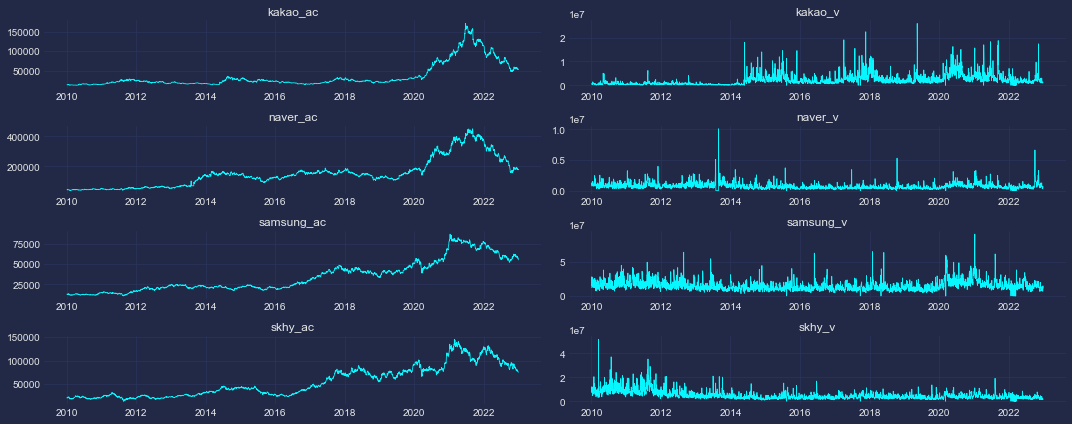

In [145]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,6))

ax_li = axes.flatten()
df_cols = df.columns
for i, (col, ax) in enumerate(zip(df_cols, ax_li)):
    ax.plot(df[col], linewidth=0.8)
    ax.set_title(col)

plt.tight_layout()
plt.show()

우선, 수정주가를 보면 카카오와 네이버의 추세가 비슷하고 삼성전자와 하이닉스의 추세가 비슷하다.  
또한 각 기업별 주가 상승은 거래량에 영향을 미쳤을 것이고, 치솟는 거래량은 반대로 주가 상승 하락의 요인이 되었을 것이다.

즉, 복합적으로 8가지 지표는 서로 연관이 있겠다는 합리적인 가정을 할 수 있겠다.

## Step 3. Granger 인과검정

VAR 예측을 수행하기 전에 해당 변수들이 모두 상호연관성이 있는가를 확인해줄 필요가 있다.  
Granger 인과검정의 영가설은 `X가 Y에 영향을 미치지 않는다` 이다. 즉, 검정 결과 p_value가 유의수준 0.05 이하라면 영가설을 기각하고 해당 변수를 예측모델의 인자로 사용하도록 한다.

`각 변수가 서로 다른 변수에 영향을 주는가?`를 검정하고, 검정 값(p-value)을 판다스 데이터프레임으로 한번에 표시할 것이다. 

이를 위해 값을 저장할 데이터프레임을 만들어주자. 값은 우선 0으로 채운다.


In [116]:
df_pairs = pd.DataFrame(data=np.zeros((len(df_cols), len(df_cols))),
                        columns = ['X_'+x for x in df_cols],
                        index = ['Y_'+x for x in df_cols])
df_pairs

,X_kakao_ac,X_kakao_v,X_naver_ac,X_naver_v,X_samsung_ac,X_samsung_v,X_skhy_ac,X_skhy_v
Y_kakao_ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y_kakao_v,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y_naver_ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y_naver_v,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y_samsung_ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y_samsung_v,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y_skhy_ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y_skhy_v,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


다음으로 샘플을 확인하기 위해 2개 변수만 가지고 granger 인과검정을 실시해보자.

In [136]:
from statsmodels.tsa.stattools import grangercausalitytests

df['kakao_ac'].diff()
sample_outs = grangercausalitytests(df[['kakao_ac','kakao_v']], maxlag=4)
print(sample_outs)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0467  , p=0.8289  , df_denom=3201, df_num=1
ssr based chi2 test:   chi2=0.0467  , p=0.8289  , df=1
likelihood ratio test: chi2=0.0467  , p=0.8289  , df=1
parameter F test:         F=0.0467  , p=0.8289  , df_denom=3201, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1880  , p=0.8286  , df_denom=3198, df_num=2
ssr based chi2 test:   chi2=0.3767  , p=0.8283  , df=2
likelihood ratio test: chi2=0.3766  , p=0.8283  , df=2
parameter F test:         F=0.1880  , p=0.8286  , df_denom=3198, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2139  , p=0.8868  , df_denom=3195, df_num=3
ssr based chi2 test:   chi2=0.6431  , p=0.8865  , df=3
likelihood ratio test: chi2=0.6431  , p=0.8865  , df=3
parameter F test:         F=0.2139  , p=0.8868  , df_denom=3195, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2602  , p=0.

In [137]:
type(sample_outs)

dict

sample_outs의 타입은 딕셔너리다. key와 value를 살펴보자.

In [138]:
sample_outs.keys()

dict_keys([1, 2, 3, 4])

In [139]:
sample_outs.values()

dict_values([({'ssr_ftest': (0.04668571486200221, 0.8289479072129631, 3201.0, 1), 'ssr_chi2test': (0.04672946904650268, 0.8288552369555231, 1), 'lrtest': (0.04672912828391418, 0.8288558513116653, 1), 'params_ftest': (0.0466857148093174, 0.8289479073078296, 3201.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb273a88450>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb2556bbed0>, array([[0., 1., 0.]])]), ({'ssr_ftest': (0.18803786899357386, 0.8285924894701826, 3198.0, 2), 'ssr_chi2test': (0.3766637238188975, 0.8283397671973269, 2), 'lrtest': (0.37664157826657174, 0.828348939268936, 2), 'params_ftest': (0.1880378690005319, 0.8285924894645922, 3198.0, 2.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb2556bbf10>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb25515cd90>, array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])]), ({'ssr_ftest': (0.21391367

key는 최소 1부터 maxlen으로 지정한 4까지 존재하며, 각 값 내부에는 검정 결과가 들어있다.

In [140]:
sample_outs[1]

({'ssr_ftest': (0.04668571486200221, 0.8289479072129631, 3201.0, 1),
  'ssr_chi2test': (0.04672946904650268, 0.8288552369555231, 1),
  'lrtest': (0.04672912828391418, 0.8288558513116653, 1),
  'params_ftest': (0.0466857148093174, 0.8289479073078296, 3201.0, 1.0)},
  array([[0., 1., 0.]])])

f테스트, 카이제곱 등의 여러 검정통계량 결과값을 보여주고 있다. 우리는 이중 카이제곱 통계량을 사용하겠다.  

In [141]:
sample_outs[1][0]['ssr_chi2test']

(0.04672946904650268, 0.8288552369555231, 1)

lag 1~4(day)까지의 p_value를 모두 확인해보면 다음과 값다.

In [142]:
[round(sample_outs[x][0]['ssr_chi2test'][1],2) for x in range(1,5)]

[0.83, 0.83, 0.89, 0.9]

여기서 p_value는 2번째 값, 0.82로 연관관계가 있다고 볼 수 없다. 즉, 영가설을 기각할 수 없다.

이제 다른 변수들의 상호 인과성을 함께 확인해보자. 단, 이번에는 4일치가 아닌 총 2주간(maxlag) 데이터로 결과값을 도출하도록 한다.

In [124]:
maxlag = 14
for col_i, col in enumerate(df_cols):
    for idx_i, idx in enumerate(df_cols):
        outs = grangercausalitytests(df[[col,idx]], maxlag=maxlag)
        pval_min = np.min([round(outs[x][0]['ssr_chi2test'][1],2) for x in range(1, maxlag+1)])
        df_pairs.iloc[idx_i, col_i] = pval_min


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=3202, df_num=1
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=2344857.0137, p=0.0000  , df_denom=3202, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=3200, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=1174459.5023, p=0.0000  , df_denom=3200, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=3198, df_num=3
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=3
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=3
parameter F test:         F=783082.0028, p=0.0000  , df_denom=3198, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=-0.

In [126]:
df_pairs

,X_kakao_ac,X_kakao_v,X_naver_ac,X_naver_v,X_samsung_ac,X_samsung_v,X_skhy_ac,X_skhy_v
Y_kakao_ac,1.00,0.0,0.00,0.49,0.05,0.00,0.34,0.00
Y_kakao_v,0.00,1.0,0.02,0.00,0.39,0.31,0.43,0.00
Y_naver_ac,0.01,0.0,1.00,0.03,0.00,0.07,0.00,0.00
Y_naver_v,0.02,0.0,0.01,1.00,0.30,0.01,0.50,0.00
Y_samsung_ac,0.00,0.0,0.00,0.03,1.00,0.00,0.01,0.00
Y_samsung_v,0.08,0.6,0.05,0.00,0.01,1.00,0.03,0.17
Y_skhy_ac,0.00,0.0,0.02,0.01,0.01,0.00,1.00,0.00
Y_skhy_v,0.38,0.0,0.71,0.00,0.73,0.00,0.83,1.00


더 뚜렷하게 보이도록 히트맵을 사용해 시각화를 수행한다.

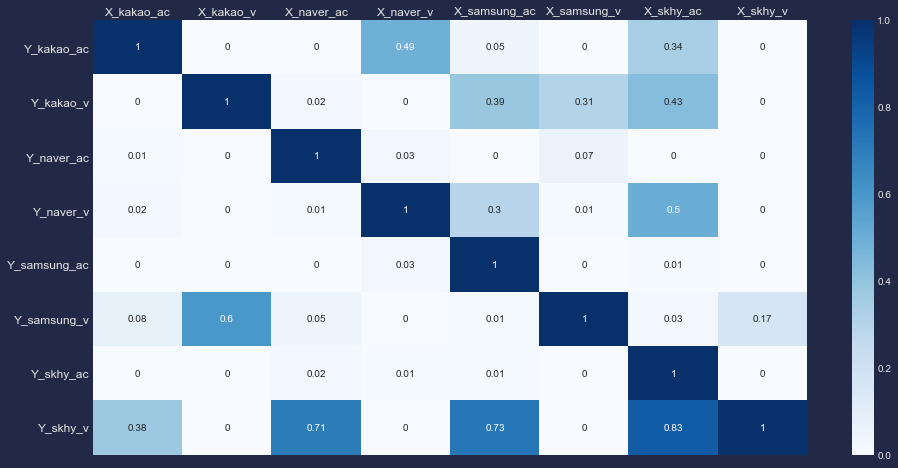

In [163]:
import seaborn as sns

plt.figure(figsize=(16,8))
ax = sns.heatmap(df_pairs, annot=True, cmap='Blues')
ax.xaxis.tick_top()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

앞에서 분석 대상 시차(maxlag)를 4일로 뒀을 때는 카카오 수정종가와 볼륨간 인과관계가 유의하지 않았으나 지금은 p_value가 유의수준 0.05 이하로 들어온다.  
다른 변수들 역시 상당 수의 변수가 다른 변수로부터 영향을 받거나 주고 있는 것을 알 수 있다.  
단, X와 Y간 영향관계가 항상 서로 주고받는 것은 아니라는 사실도 위 히트맵을 통해 확인할 수 있다.
예를 들어, 네이버 거래량(X_naver_v)은 카카오 수정종가(Y_kakao_ac)에 영향을 준다고 보기 어려운(p_value==0.49) 반면 카카오 수정종가(X_kakao_ac)는 네이버 거래량(Y_naver_v)에 유의한 영향을 준.

우리는 서로 영향을 주고 받는, 즉 상호 연관성이 있는 양방향 변수들만 VAR 모델 인자로 사용할 것이다.  
이 조건에 만족하는 조합은 다음과 같다. 
- `[kakao_ac, kakao_v, naver_ac]`
- `[kakao_v, naver_ac, naver_v]`
- `[samsung_ac, samsung_v, skhy_ac]`
- ...


## Step 4. Cointegration Test

공적분 검정(혹은 요한슨 검정)은 다중 시계열 간 적분상 균형관계가 존재하는가를 판단한다.  
즉, Granger 검정이 단일 시계열보다 다중 시계열로 설명력을 더 얻을수 있는가? 를 확인해주었다면, Cointegration 검정은 다중 시계열이 장기적 기간을 두고 안정적인 연관성을 보이는가? 를 확인해준다.  
따라서 Granger 검정을 통해 필터링한 변수 조합 중 최적 조합을 찾기 위해 Cointegration 검정을 한번 더 실시하고자 한다.

In [241]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

sample_group = ['kakao_ac','kakao_v','naver_ac']
out = coint_johansen(df[sample_group], 1, 1)
out.lr1

array([453.97917988,   9.88834366,   1.92223596])

파이썬을 통해 공적분은 위와 같이 수행할 수 있다. 결과값으로 나온 수치는 각각 kakao_ac, kakao_v, naver_ac에 대한 공적분 통계량에 해당한다.

In [242]:
cvt_df = pd.DataFrame(out.cvt)
cvt_df.columns = ['90%', '95%', '99%']
cvt_df.index = sample_group
cvt_df

,90%,95%,99%
kakao_ac,32.0645,35.0116,41.0815
kakao_v,16.1619,18.3985,23.1485
naver_ac,2.7055,3.8415,6.6349


`out.cvt`를 통해 각 유의수준에 해당하는 통계량을 확인할 수 있다. 공적분 결과값이 해당 유의수준 통계량보다 크다면(우측, 단측검정) 유의하다. 즉, 장기적으로 안정적인 연관성이 있다고 판단한다.

In [232]:
def calc_sig_dist(cols):
    out = coint_johansen(df[cols], 1, 1)
    stats = [round(x,2) for x in out.lr1]
    sigs = [round(x,2) for x in out.cvt[:, 1]]
    yns = [x>y for x,y in zip(stats,sigs)]
    dist = np.mean(np.array(stats) - np.array(sigs))
    

    print('stats: ',stats)
    print('sig-level: ',sigs)
    print('significant_yn: ',[x>y for x,y in zip(stats,sigs)])
    print('dist: ', round(dist,2))


stats는 공적분 통계량, sig-level은 유의수준 0.05에 해당하는 관측치, significant_yn은 유의 여부(장기 안정성), dist는 안정성의 강도를 의미한다.  
함수를 통해 앞에서 묶은 그룹 3가지를 확인해보고, significant_yn이 모두 True이면서 dist가 가장 큰 그룹을 찾아보자.

In [226]:
calc_sig_dist(['kakao_ac','kakao_v','naver_ac'])

stats:  [453.98, 9.89, 1.92]
sig-level:  [35.01, 18.4, 3.84]
sigificant_yn:  [True, False, False]
dist:  136.18


In [229]:
calc_sig_dist(['kakao_ac','naver_v','naver_ac'])

stats:  [617.39, 9.96, 1.91]
sig-level:  [35.01, 18.4, 3.84]
sigificant_yn:  [True, False, False]
dist:  190.67


In [230]:
calc_sig_dist(['samsung_ac','samsung_v','skhy_v'])

stats:  [1051.24, 456.63, 4.91]
sig-level:  [35.01, 18.4, 3.84]
sigificant_yn:  [True, True, True]
dist:  485.18


## Step 5. Split Datasets (Train / Test)

우리는 과거 데이터를 가지고 가장 최근 30일을 예측해보려 한다.  
위에서 확인한 그룹을 추출해 최근 30일 전후로 데이터를 구분하자.

In [251]:
target_lag = 30
target_df = df[['samsung_ac','samsung_v','skhy_v']]

df_train = target_df.iloc[:-target_lag, :]
df_test = target_df.iloc[-target_lag:, :]

print(df_train.shape, df_test.shape)

(3175, 3) (30, 3)


In [252]:
df

,kakao_ac,kakao_v,naver_ac,naver_v,samsung_ac,samsung_v,skhy_ac,skhy_v
Date,,,,,,,,
2010-01-04,13954.350586,789077,46136.023438,974307,12644.309570,11950800,20985.427734,7327477
2010-01-05,14068.419922,616248,46136.023438,920400,12847.493164,27925850,20332.355469,12080229
2010-01-06,14125.454102,359620,45896.968750,1283697,13144.456055,22948850,21377.273438,7698642
2010-01-07,13954.350586,492582,46016.503906,733984,12706.827148,22107950,21246.660156,11059707
2010-01-08,13859.293945,568588,44462.695312,885303,12831.866211,14777550,21464.347656,9686656
...,...,...,...,...,...,...,...,...
2022-12-23,53400.000000,1339673,178000.000000,613209,57739.000000,9829407,77496.882812,1554446
2022-12-26,53600.000000,988777,178500.000000,350843,57540.242188,6756411,76700.000000,1414717
2022-12-27,54400.000000,1226474,181000.000000,492232,57739.000000,10667027,76700.000000,1694225


## Step 6. Stationary Test

마지막으로 VAR 모델을 만들기 전에 입력 데이터의 정상성을 확보해야 한다. 특히 수정종가의 경우 주가 특성상 추세를 포함할 것이므로 정상성을 띄지 않을 가능성이 매우 높다.  
(여기서 정상성이란 시간의 흐름에 관계없이 데이터의 평균 및 분산이 일정함을 의미하며 이러한 특성은 시계열 분석의 기본 전제가 된다.)

시계열 정상성은 Augmented Dickey-Fully(ADF) 검정을 통해 확인하도록 한다. 영가설은 `정상성을 띄지 않는다` 이다.  
ADF는 추세를 포함하는 시계열 데이터에 대해서도 단위근 검정을 실시해주는 방법론이며, Dickey-Fully(DF) 검정을 더욱 일반화시킨 방식이다.

`samgsung_ac` 데이터로 먼저 ADF 검정을 실시하고, 결과값 형태를 확인해보자.

In [257]:
from statsmodels.tsa.stattools import adfuller

adf_sample = adfuller(df_train['samsung_ac'], autolag='AIC') # AIC가 가장 낮은 lag(시차)를 자동 선택
adf_sample

(-0.7808633243482267,
 0.8246787955943002,
 28,
 3146,
 {'1%': -3.432430306322329,
  '5%': -2.862459151265583,
  '10%': -2.567259285721503},
 49407.65034169026)

보기 편하게 데이터프레임으로 변환해보자.  
p_value가 0.05보다 작은가, 즉 인덱스 기준 stat이 5% 유의구간 내에 들어가는가를 확인하면 된다.  
결과값에서 알 수 있듯이 좌측 단측검정이다. 

In [276]:
adf_df = pd.DataFrame(adf_sample[:4])
adf_df.columns = ['samsung_ac']
adf_df.index = ['stat','p_value','lag','observ']

sig = pd.DataFrame(data={'samsung_ac':adf_sample[4]['5%']}, index=['5%'])
adf_df = pd.concat([adf_df, sig], axis=0)
adf_df



,samsung_ac
stat,-0.780863
p_value,0.824679
lag,28.000000
observ,3146.000000
5%,-2.862459


`samsung_ac`의 경우 `stat`이 `5%` 보다 크다. 따라서 영가설을 기각할 수 없다.  
마찬가지로 나머지 2개 변수도 ADF 검정을 실시한다.

In [289]:
def get_adf_df(data):
    adf_df = pd.DataFrame(adfuller(data, autolag='AIC')[:4])
    adf_df.columns = [col]
    adf_df.index = ['stat','p_value','lag','observ']

    sig = pd.DataFrame(data={col:adf_sample[4]['5%']}, index=['5%'])
    adf_df = pd.concat([adf_df, sig], axis=0)
    adf_df = adf_df.apply(lambda x : round(x, 2))
    return adf_df

In [290]:
get_adf_df(df_train['samsung_v'])

,skhy_v
stat,-7.15
p_value,0.00
lag,15.00
observ,3159.00
5%,-2.86


In [291]:
get_adf_df(df_train['skhy_v'])

,skhy_v
stat,-3.49
p_value,0.01
lag,26.00
observ,3148.00
5%,-2.86


거래량을 나타내는 `samsung_v`와  `skhy_v`는 정상성을 만족한다. 따라서 우리는 VAR 모델링을 위해 `samsung_ac`만 정상성을 만족시켜주면 되겠다.

차분을 통해 간단히 분포를 바꿔주고 정상성을 다시 확인한다.  
(차분을 수행하면 첫번째 인덱스는 nan값으로 바뀐다. bfill()함수를 통해 두번째 값으로 첫번째 값을 채워주겠다.)

In [293]:
get_adf_df(df_train['samsung_ac'].diff().bfill())

,skhy_v
stat,-10.43
p_value,0.00
lag,27.00
observ,3147.00
5%,-2.86


1회 차분으로 `samsung_ac` 변수도 정상성을 확보했다. 이제 모델을 만들어보자.

## Step 7. VAR

VAR 모델 역시 파이썬 함수를 통해 간단히 구현가능하다. 앞에서 1회 차분이 정상성을 확보시켜주는 것을 확인했으므로 해당 데이터만 치환한 후 데이터를 인자로 넘겨주겠다.

In [295]:
df_train_ = df_train.drop('samsung_ac', axis=1).copy()
df_train_['samsung_ac_diff'] = df_train['samsung_ac'].diff().bfill()
df_train_

,samsung_v,skhy_v,samsung_ac_diff
Date,,,
2010-01-04,11950800,7327477,203.183594
2010-01-05,27925850,12080229,203.183594
2010-01-06,22948850,7698642,296.962891
2010-01-07,22107950,11059707,-437.628906
2010-01-08,14777550,9686656,125.039062
...,...,...,...
2022-11-11,20037163,5002149,2484.464844
2022-11-14,15973416,2483441,-993.785156
2022-11-15,12310986,2460465,496.890625


In [297]:
from statsmodels.tsa.api import VAR

var = VAR(df_train_)

In [298]:
var.select_order(maxlags=30).summary()

,AIC,BIC,FPE,HQIC
0,74.53,74.54,2.340e+32,74.53
1,73.63,73.66,9.521e+31,73.64
2,73.54,73.58,8.683e+31,73.56
3,73.47,73.52,8.058e+31,73.49
4,73.44,73.51,7.835e+31,73.47
5,73.41,73.51*,7.649e+31,73.45
6,73.40,73.51,7.567e+31,73.44*
7,73.40,73.52,7.522e+31,73.44
8,73.40,73.54,7.532e+31,73.45
9,73.40,73.56,7.525e+31,73.46


AIC가 10 이상만 되어도 유의한 예측이라고 보기 어렵다.  
물론 데이터를 더 가공하고 양질의 연관 변수를 추가해볼 수도 있겠지만 이 경우는 기본 값 자체가 매우 커서 그렇다.  
데이터 범위가 커서 예측 수준이 떨어지는 것이다.

따라서 데이터를 한번 더 처리해주겠다. 이번에는 정규화를 시켜줄텐데, 시계열 데이터의 경우 정규화에 주의해야 한다.  
예측값이 최근 일자, 관측값이 과거 일자이므로 정규화가 최근 일자 예측에 어떠한 영향도 미쳐선 안된다. 예를 들어, 전체 데이터를 min-max-scailing한다거나 하는 식으로 말이다.  
우리는 전체 평균이 아니라 첫날 데이터를 0으로 기준을 잡고, 그 이후에는 첫날 대비 변화량을 보려줄 수 있도록 할 것이다.

In [307]:
df_train_norm = (df_train_ / df_train_.iloc[0]) - 1
df_train_norm

,samsung_v,skhy_v,samsung_ac_diff
Date,,,
2010-01-04,0.000000,0.000000,0.000000
2010-01-05,1.336735,0.648621,0.000000
2010-01-06,0.920277,0.050654,0.461550
2010-01-07,0.849914,0.509347,-3.153859
2010-01-08,0.236532,0.321963,-0.384601
...,...,...,...
2022-11-11,0.676638,-0.317344,11.227684
2022-11-14,0.336598,-0.661078,-5.891070
2022-11-15,0.030139,-0.664214,1.445525


데이터를 한번 더 처리했으니 정상성 여부도 체크해준다.  
참고로, 일반적으로 정제 강도가 커질수록 정보가 희석되고 정상성이 커지므로 정상 데이터가 비정상으로 다시 회귀하는 경우는 잘 없다.

In [310]:
print(get_adf_df(df_train_norm['samsung_ac_diff']).loc['p_value'])
print(get_adf_df(df_train_norm['samsung_v']).loc['p_value'])
print(get_adf_df(df_train_norm['skhy_v']).loc['p_value'])

skhy_v    0.0
Name: p_value, dtype: float64
skhy_v    0.0
Name: p_value, dtype: float64
skhy_v    0.01
Name: p_value, dtype: float64


이제 다시 VAR 모델에 데이터를 태워준다.

In [313]:
var_norm = VAR(df_train_norm)
var_norm.select_order(maxlags=20).summary()

,AIC,BIC,FPE,HQIC
0,-0.3014,-0.2957,0.7397,-0.2994
1,-1.203,-1.180,0.3003,-1.195
2,-1.295,-1.254,0.2740,-1.280
3,-1.370,-1.312,0.2542,-1.349
4,-1.398,-1.323,0.2471,-1.371
5,-1.423,-1.331*,0.2411,-1.390
6,-1.434,-1.324,0.2385,-1.394*
7,-1.439,-1.312,0.2373,-1.393
8,-1.437,-1.293,0.2377,-1.385
9,-1.438,-1.276,0.2375,-1.380


일반적으로 AIC 기준 2.0 이하는 모델이 타당하다고 할 수 있습니다.  
모델은 과거 1주일치 데이터만 가지고도 어느 정도의 성능을 보이고 있으며, 예측 정확도는 2주 데이터가 확보되었을 때 가장 높았습니다.  
따라서 모델의 시차(lag)를 2주로 적합시킵니다.

In [315]:
model = var_norm.fit(14)
model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Feb, 2023
Time:                     19:38:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.19712
Nobs:                     3161.00    HQIC:                  -1.35567
Log likelihood:          -11044.0    FPE:                   0.235895
AIC:                     -1.44437    Det(Omega_mle):        0.226524
--------------------------------------------------------------------
Results for equation samsung_v
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.058572         0.018117            3.233           0.001
L1.samsung_v                0.396664         0.018780           21.122           0.000
L1.skhy_v                   0.09

summary에서 중요한 부분은 마지막 `Correlation matrix`다.  
해당 관측치는 변수 잔차간 상관관계인데, 이 수치가 크다면 아직 고려해야 할 요소들이 남아있는 것이며 모델은 충분한 설명력을 갖추지 못했다고 볼 수 있다.  

`Correlation matrix`는 이는 다음과 같이 직접 추출할 수 있다. 

In [317]:
model.resid.corr()

,samsung_v,skhy_v,samsung_ac_diff
samsung_v,1.000000,0.310549,-0.028042
skhy_v,0.310549,1.000000,-0.023244
samsung_ac_diff,-0.028042,-0.023244,1.000000


다만, 이렇게 봤을 때 이것이 유의한 수준인지 그렇지 않은지 확인할 수 없으므로 마찬가지로 검정통계를 실시한다.  
잔차의 독립성 검정은 Durbin Watson 검정을 통해 수행하도록 하자.

In [341]:
from statsmodels.stats.stattools import durbin_watson

durbin_res = pd.DataFrame([model.resid.columns, 
                           [round(x,2) for x in durbin_watson(model.resid)]]).T
durbin_res.set_index([0])

,1
0,
samsung_v,2.01
skhy_v,2.0
samsung_ac_diff,2.0


Durbin Watson 검정은 다음과 같이 해석한다.
- 범위 : 0~4
- 양의 상관관계 : 0에 수렴
- 음의 상관관계 : 4에 수렴
- 상관관계 없음 : 2에 수렴

위 해석에 따라 본 모델은 잔차간 상관성이 유의하지 않은 수준이며, 충분한 예측 설명력을 갖췄음을 확인할 수 있다.

## Step 8. Forecast

우리가 만든 모델의 lag는 예측을 위해 사용할 데이터 범위가 된다. 즉, 과거 14일치 데이터를 가지고 앞으로의 주가를 예측한다.

In [342]:
model.k_ar

14

In [344]:
ins = df_train_norm.values[-model.k_ar:]
ins

array([[ 0.58981106, -0.14410185,  9.2712679 ],
       [ 0.43937201, -0.47864934,  1.93465347],
       [ 0.10477282, -0.65385589, -2.95643564],
       [ 0.46368126, -0.60404106, -2.95643564],
       [ 0.04142325, -0.58608058, -0.02178218],
       [ 0.04070405, -0.62261444,  2.91287129],
       [ 0.52909412, -0.61793466,  6.82572335],
       [ 0.17528467, -0.64247558, -0.0218014 ],
       [ 0.76453735, -0.47365089, -8.82570412],
       [ 0.6766378 , -0.31734361, 11.22768432],
       [ 0.33659805, -0.66107829, -5.89106988],
       [ 0.03013907, -0.66421389,  1.44552533],
       [ 0.08020049, -0.64391577,  0.46732673],
       [ 0.11275362, -0.49452315, -7.35839662]])

3개 변수에 대한 최근 14일치의 데이터다. 앞에서 우리는 최근 30일치를 기준으로 train dataset를 나눴기 때문에 30일치보다 앞선 14일치 데이터라고 보면 되겠다.

In [396]:
f = model.forecast(y=ins, steps=7)
df_f = pd.DataFrame(f, columns=df_train_norm.columns)
df_f

,samsung_v,skhy_v,samsung_ac_diff
0,0.238604,-0.547080,-0.922510
1,0.329962,-0.508880,-0.632579
2,0.317908,-0.485796,-0.964324
3,0.286372,-0.548481,-1.451569
4,0.196735,-0.527286,-0.230284
5,0.172887,-0.607043,-1.250776
6,0.289473,-0.582000,-0.952539


forecast 함수를 사용해 df_train 기준 마지막 14개 행의 데이터로 다음 7개 행을 예측했다.  
예측한 값을 실제 값과 비교하기 위해서는 실제 값의 분포로 다시 돌려줘야 한다.  

먼저 전체 데이터셋에 대해 첫번째 행 데이터 기준 정규화를 해줬으니 반대로 역정규화를 시켜주자.

In [393]:
df_train_.iloc[0]

samsung_v          1.195080e+07
skhy_v             7.327477e+06
samsung_ac_diff    2.031836e+02
Name: 2010-01-04 00:00:00, dtype: float64

In [397]:
df_f_denorm = (df_f + 1).mul(df_train_.iloc[0].to_numpy())
df_f_denorm

,samsung_v,skhy_v,samsung_ac_diff
0,1.480231e+07,3.318761e+06,15.744768
1,1.589411e+07,3.598672e+06,74.653904
2,1.575005e+07,3.767816e+06,7.248679
3,1.537318e+07,3.308495e+06,-91.751417
4,1.430194e+07,3.463802e+06,156.393752
5,1.401694e+07,2.879383e+06,-50.953588
6,1.541023e+07,3.062884e+06,9.643387


다음 단계는 1차 차분시킨 samsung_ac_diff도 원상 복귀시키는 것이다.  
학습데이터 기준, 마지막 날부터 누적합을 통해 계산할 수 있다.

In [390]:
df_train['samsung_ac'].iloc[-1]

61018.49609375

In [400]:
df_train

,samsung_ac,samsung_v,skhy_v
Date,,,
2010-01-04,12644.309570,11950800,7327477
2010-01-05,12847.493164,27925850,12080229
2010-01-06,13144.456055,22948850,7698642
2010-01-07,12706.827148,22107950,11059707
2010-01-08,12831.866211,14777550,9686656
...,...,...,...
2022-11-11,62509.175781,20037163,5002149
2022-11-14,61515.390625,15973416,2483441
2022-11-15,62012.281250,12310986,2460465


In [410]:
# np.r_은 배열은 연결해줍니다.
df_f_denorm['samsung_ac'] = np.r_[df_train['samsung_ac'].iloc[-1],
                                  df_f_denorm['samsung_ac_diff']].cumsum()[1:]
df_f_denorm

,samsung_v,skhy_v,samsung_ac_diff,samsung_ac
0,1.480231e+07,3.318761e+06,15.744768,61034.240861
1,1.589411e+07,3.598672e+06,74.653904,61108.894765
2,1.575005e+07,3.767816e+06,7.248679,61116.143444
3,1.537318e+07,3.308495e+06,-91.751417,61024.392027
4,1.430194e+07,3.463802e+06,156.393752,61180.785779
5,1.401694e+07,2.879383e+06,-50.953588,61129.832191
6,1.541023e+07,3.062884e+06,9.643387,61139.475578


마지막으로, 테스트 데이터셋과 동일한 시계열상에 올려주자. 

In [419]:
df_f_denorm.index = df_test.index[:7]
df_f_denorm

,samsung_v,skhy_v,samsung_ac_diff,samsung_ac
Date,,,,
2022-11-18,1.480231e+07,3.318761e+06,15.744768,61034.240861
2022-11-21,1.589411e+07,3.598672e+06,74.653904,61108.894765
2022-11-22,1.575005e+07,3.767816e+06,7.248679,61116.143444
2022-11-23,1.537318e+07,3.308495e+06,-91.751417,61024.392027
2022-11-24,1.430194e+07,3.463802e+06,156.393752,61180.785779
2022-11-25,1.401694e+07,2.879383e+06,-50.953588,61129.832191
2022-11-28,1.541023e+07,3.062884e+06,9.643387,61139.475578


데이터셋이 준비되었으므로 예측값과 실제값을 시각화를 통해 비교해보도록 하자.

In [491]:
def draw_subplot(axes, ax_i, col):
    d_test = df_test[col].iloc[:7]
    d_pred = df_f_denorm[col]
    
    d_test.diff() > 0
    
    axes[ax_i].plot(d_test, label='real')
    axes[ax_i].plot(d_pred, label='pred')
    
    hits = (d_test.diff() < 0) == (d_pred.diff() < 0)
    for i, hit in enumerate(hits):
        if hit:
            if i==0:
                pass
            if i+1==len(hits):
                i==None
            axes[ax_i].fill_between(x=d_test.index[i-1:i+1], 
                                    y1=d_pred[i-1:i+1],
                                    y2=d_test[i-1:i+1], 
                                    color='lightpink', 
                                    alpha=0.1)       
    axes[ax_i].set_title(col)
    axes[ax_i].legend(loc=(1,1))

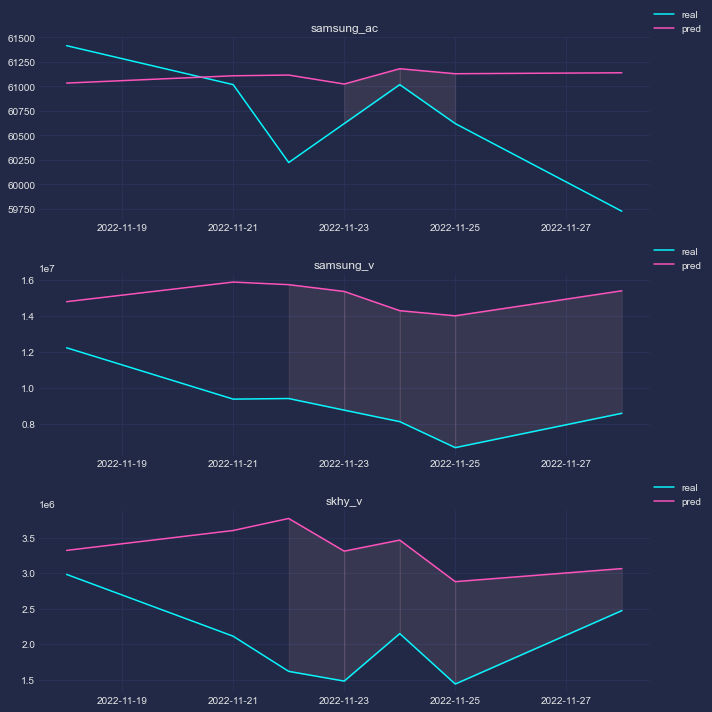

In [492]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

draw_subplot(axes, 0, 'samsung_ac')
draw_subplot(axes, 1, 'samsung_v')
draw_subplot(axes, 2, 'skhy_v')

plt.tight_layout()
plt.show()

이렇게 7일간의 데이터 예측치를 살펴보았고, 상승 및 하락 여부가 일치하는 구간에는 영역을 채워줬다.
위 결과값만 놓고 보면 VAR 모형이 종가 예측보다는 거래량 예측에 더 나은 성능을 내는 것으로 보이며 추세도 어느 정도 잘 판단해내는 듯 하다.  

만약 이 모델에 대한 정량적 평가를 실시해보고 싶다면 다음의 순서를 따르면 되겠다.
1. 14일치 데이터셋을 최소 30개 이상 확보한다. 
2. 각 데이터셋(배치)에 대한 7일간 예측치과 실제값의 오차를 RMSE 등의 방식으로 계산한다.

다만, 주가데이터 특성상 종가의 범위가 주식마다 매우 다르기 때문에 상승 및 하락에 대한 예측정확도를 평가하는 것도 하나의 방법이며 방식은 다음과 같다.
1. 모형 결과로 나온 값을 차분한다.
2. 차분 값을 음수와 양수를 2개 클래스로 나눈다.(위 시각화에서도 상승하락 여부가 같은지 유사한 프로세스로 비교하였다.)
3. 실제 데이터도 동일하게 차분 및 이진화로 라벨링을 수행한 후 f1 스코어 등으로 평가한다.

지금까지 이렇게 VAR 모형의 간단한 개념을 알아보고, 모형을 사용하기 위한 통계적 검정들도 수행한 뒤, 모델링 및 예측까지 시도해보았다.  
